# Ayudantía TG1 Pandas - Seaborn


La idea de esta ayudantía es ver algunos conceptos básicos sobre pandas y aprender cómo visualizar datos con seaborn.

## I. Pandas
---

Primero estudiaremos la herramienta de análisis de datos pandas, una librería que permite hacer análisis y limpieza de datos en Python. También es utilizada en conjunto con otras herramientas para hacer Data Science como NumPy, SciPy, matplotlib y scikit-learn

In [1]:
import pandas as pd

### 1. Series
Vamos a partir instanciando objetos de tipo `Series`. Estos objetos son como arreglos **unidimensionales**, solo que su índice es más explícito.

In [2]:
obj = pd.Series([1, 3, -4, 7])
obj

0    1
1    3
2   -4
3    7
dtype: int64

Podemos acceder a sus elementos al igual como lo hacemos con las listas de python.

In [3]:
obj[0]

1

In [4]:
obj[2:]

2   -4
3    7
dtype: int64

Podemos tener distintos tipos de datos.

In [5]:
obj = pd.Series(['string', 3, -4, 7])
obj

0    string
1         3
2        -4
3         7
dtype: object

Para un objeto de tipo `Series` podemos agregar un label a sus índices.

In [6]:
obj = pd.Series([1, 3, -4, 7], index=['d', 'c', 'b', 'a'])
obj

d    1
c    3
b   -4
a    7
dtype: int64

In [7]:
obj['c']

3

In [8]:
obj[1]

3

Podemos seleccionar varios elementos según el label de su índice o su posición.

In [9]:
obj[['c', 'a']]

c    3
a    7
dtype: int64

In [10]:
obj[[0, 2]]

d    1
b   -4
dtype: int64

Podemos hacer filtros pasando un arreglo de booleanos:

In [11]:
obj[obj > 2]

c    3
a    7
dtype: int64

In [12]:
obj > 2

d    False
c     True
b    False
a     True
dtype: bool

Finalmente, podemos crear un objeto Series a partir de un diccionario. Supongamos el siguiente diccionario de personas junto a su edad.

In [13]:
people = {'Alice': 20, 'Bob': 17, 'Charles': 23, 'Dino': 50}
people_series = pd.Series(people)
people_series

Alice      20
Bob        17
Charles    23
Dino       50
dtype: int64

### 2. Dataframes

Un objeto de tipo `DataFrame` representa una tabla, en que cada una de sus columnas representa un tipo. Vamos a construir una tabla a partir de un diccionario.

In [14]:
reg_chile = {'name': ['Metropolitana', 'Valparaiso', 'Biobío', 'Maule', 'Araucanía', 'O\'Higgins'],
             'pop': [7112808, 1815902, 1538194, 1044950, 957224, 914555],
             'pib': [24850, 14510, 13281, 12695, 11064, 14840]}
frame = pd.DataFrame(reg_chile)
frame

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695
4,Araucanía,957224,11064
5,O'Higgins,914555,14840


Podemos usar la función head para tener sólo las 5 primeras columnas del Data Frame. En este caso no es mucho aporte, pero para un Data Frame más grande no puede servir para ver cómo vienen los datos.

In [15]:
frame.head()

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695
4,Araucanía,957224,11064


In [16]:
frame.head(2)

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510


### 3. Cargando un CSV 

Podemos crear un dataframe a partir de datos en un archivo csv, de la siguiente forma:

In [17]:
df = pd.read_csv('books.csv') 
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Puedes pasarle como argumento `sep=algun_string` para cambiar el separador del csv. Por ejemplo si el archivo tuviera separación con `;`, podrías hacer algo como:

```py
df = pd.read_csv('books.csv', sep=';') 
```

También podrías querer especificar el tipo de encoding:

```py
df = pd.read_csv('books.csv', sep=';', encoding='UTF-8') 
```
Para saber más sobre este tema, puedes ir directamente a la [documentación](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.read_csv.html).

Podríamos cargar el archivo csv, utilizando urls:

In [18]:
url = 'https://raw.githubusercontent.com/Exploratorio-DCC-PUC/Syllabus/master/Ayudant%C3%ADas/AyudantiaTG1%20-%20Pandas/books.csv'
df_url = pd.read_csv(url, encoding='UTF-8') 
df_url.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


También podríamos querer usar solo algunas columnas del df, aquí tenemos algunas opciones:

In [19]:
df1 = df.drop(columns=['Reviews', 'Genre'])
df1

,Name,Author,User Rating,Price,Year
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,8,2016
1,11/22/63: A Novel,Stephen King,4.6,22,2011
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,15,2018
3,1984 (Signet Classics),George Orwell,4.7,6,2017
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,12,2019
...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,8,2019
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,8,2016
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,8,2017
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,8,2018


In [20]:
df2 = df[['Name', 'Author', 'Price']]
df2

,Name,Author,Price
0,10-Day Green Smoothie Cleanse,JJ Smith,8
1,11/22/63: A Novel,Stephen King,22
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,15
3,1984 (Signet Classics),George Orwell,6
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,12
...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,8
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,8
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,8
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,8


In [21]:
df3 = pd.read_csv('books.csv', usecols=['Name', 'Author', 'Price']) 
df3

,Name,Author,Price
0,10-Day Green Smoothie Cleanse,JJ Smith,8
1,11/22/63: A Novel,Stephen King,22
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,15
3,1984 (Signet Classics),George Orwell,6
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,12
...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,8
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,8
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,8
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,8


### 4. Filas y columnas

Podemos proyectar valores pasando el nombre de las columnas que deseamos dejar.

In [22]:
df['Name']

0                          10-Day Green Smoothie Cleanse
1                                      11/22/63: A Novel
2                12 Rules for Life: An Antidote to Chaos
3                                 1984 (Signet Classics)
4      5,000 Awesome Facts (About Everything!) (Natio...
                             ...                        
545         Wrecking Ball (Diary of a Wimpy Kid Book 14)
546    You Are a Badass: How to Stop Doubting Your Gr...
547    You Are a Badass: How to Stop Doubting Your Gr...
548    You Are a Badass: How to Stop Doubting Your Gr...
549    You Are a Badass: How to Stop Doubting Your Gr...
Name: Name, Length: 550, dtype: object

In [23]:
df[['Name']]

,Name
0,10-Day Green Smoothie Cleanse
1,11/22/63: A Novel
2,12 Rules for Life: An Antidote to Chaos
3,1984 (Signet Classics)
4,"5,000 Awesome Facts (About Everything!) (Natio..."
...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14)
546,You Are a Badass: How to Stop Doubting Your Gr...
547,You Are a Badass: How to Stop Doubting Your Gr...
548,You Are a Badass: How to Stop Doubting Your Gr...


In [24]:
df[['Name', 'Price']]

,Name,Price
0,10-Day Green Smoothie Cleanse,8
1,11/22/63: A Novel,22
2,12 Rules for Life: An Antidote to Chaos,15
3,1984 (Signet Classics),6
4,"5,000 Awesome Facts (About Everything!) (Natio...",12
...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),8
546,You Are a Badass: How to Stop Doubting Your Gr...,8
547,You Are a Badass: How to Stop Doubting Your Gr...,8
548,You Are a Badass: How to Stop Doubting Your Gr...,8


Podemos seleccionar una determinada fila con la función iloc.

In [25]:
df.iloc[2]

Name           12 Rules for Life: An Antidote to Chaos
Author                              Jordan B. Peterson
User Rating                                        4.7
Reviews                                          18979
Price                                               15
Year                                              2018
Genre                                      Non Fiction
Name: 2, dtype: object

### 5.  Funciones de pandas

La librería pandas tiene varias funciones que nos permiten obtener descripciones y resúmenes de los datos. Vamos a ver algunos ejemplos. Recordemos primero como se ven los datos:

In [26]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [27]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [28]:
df['User Rating'].mean()

4.618363636363637

In [29]:
df['User Rating'].max()

4.9

In [30]:
df['User Rating'].min()

3.3

In [31]:
df.nlargest(10, 'User Rating')

,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction


### 6. Métodos pandas vs for

In [32]:
import time
t1 = time.time()
suma_1 = df['Reviews'].sum()
tiempo_1 = (time.time() - t1) * 1000
print('La función sum de pandas se ha demorado {}'.format(tiempo_1))
print('La suma es: {}'.format(suma_1))

t2 = time.time()
suma_2 = 0
for review in df['Reviews']:
    if not pd.isnull(review):
        suma_2 += review
tiempo_2 = (time.time() - t2) * 1000
print('Iteración con for se ha demorado {}'.format(tiempo_2))
print('La suma es: {}'.format(suma_2))

La función sum de pandas se ha demorado 0.37360191345214844
La suma es: 6574305
Iteración con for se ha demorado 0.43892860412597656
La suma es: 6574305


### 7. Agrupar

In [33]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [34]:
pd.unique(df['Genre'])

array(['Non Fiction', 'Fiction'], dtype=object)

In [35]:
df.groupby(by='Genre').mean()

,User Rating,Reviews,Price,Year
Genre,,,,
Fiction,4.648333,15683.791667,10.850000,2013.925000
Non Fiction,4.595161,9065.145161,14.841935,2014.058065


### 8. Filtrar

Podemos querer filtrar nuestros datos de acuerdo a alguna condición, por ejemplo, queremos crear un dataframe solo para los libros de género ficción:

In [36]:
df['Genre']

0      Non Fiction
1          Fiction
2      Non Fiction
3          Fiction
4      Non Fiction
          ...     
545        Fiction
546    Non Fiction
547    Non Fiction
548    Non Fiction
549    Non Fiction
Name: Genre, Length: 550, dtype: object

In [37]:
df['Genre'] == 'Fiction'

0      False
1       True
2      False
3       True
4      False
       ...  
545     True
546    False
547    False
548    False
549    False
Name: Genre, Length: 550, dtype: bool

In [38]:
df[df['Genre'] == 'Fiction']

,Name,Author,User Rating,Reviews,Price,Year,Genre
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
...,...,...,...,...,...,...,...
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction


In [39]:
df_fiction = df[df['Genre'] == 'Fiction']
df_fiction

,Name,Author,User Rating,Reviews,Price,Year,Genre
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
...,...,...,...,...,...,...,...
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
542,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction


Otro ejemplo, que incluye más de una condición, son los libros con precio menor a 10 y con rating mayor o igual a 4.5

In [40]:
df['Price'] < 10

0       True
1      False
2      False
3       True
4      False
       ...  
545     True
546     True
547     True
548     True
549     True
Name: Price, Length: 550, dtype: bool

In [41]:
df['User Rating'] >= 4.5

0      True
1      True
2      True
3      True
4      True
       ... 
545    True
546    True
547    True
548    True
549    True
Name: User Rating, Length: 550, dtype: bool

In [42]:
df[(df['Price'] < 10) & (df['User Rating'] >= 4.5)]

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Notar que aquí en vez de `or` y `and`, usamos `|` y `&` respectivamente.

## II. Seaborn
---

Seaborn es una libería de visualización de datos de Python, basada en matplotlib. Provee una interfaz de alto nivel para realizar atractivos e informativos gráficos estadísticos (o por lo menos así lo describen ellos).

En este notebook solo veremos un par de ejemplos de lo que pueden realizar con esta librería. Para más información y detalles, dirigirse a la documentación.

In [43]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

Por ejemplo, para realizar un [histograma](https://seaborn.pydata.org/generated/seaborn.histplot.html) para los precios de los libros:

<AxesSubplot:xlabel='Price', ylabel='Count'>

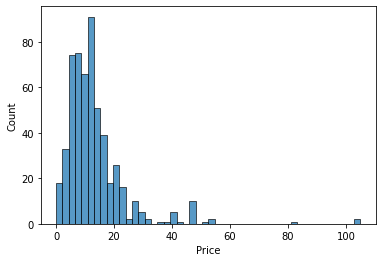

In [44]:
sns.histplot(data=df, x="Price")

Para realizar un [gráfico de dispersión](https://seaborn.pydata.org/generated/seaborn.regplot.html) donde en el eje x tenemos el precio y en el eje y tenemos el rating:

<AxesSubplot:xlabel='Price', ylabel='User Rating'>

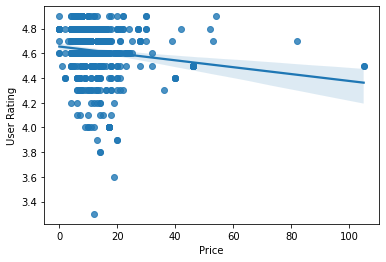

In [45]:
sns.regplot(x='Price', y="User Rating", data=df)